In [1]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [36]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/TATAMOTORS.csv")

In [37]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TELCO,EQ,201.60,207.4,217.25,207.4,217.0,216.75,214.28,676126,1.448775e+13,NaN,NaN,NaN
1,2000-01-04,TELCO,EQ,216.75,217.0,219.00,206.0,211.9,208.20,209.50,679215,1.422962e+13,NaN,NaN,NaN
2,2000-01-05,TELCO,EQ,208.20,194.0,217.80,194.0,213.1,213.25,210.33,1120951,2.357684e+13,NaN,NaN,NaN
3,2000-01-06,TELCO,EQ,213.25,215.0,229.90,215.0,222.0,222.10,225.29,1968998,4.435932e+13,NaN,NaN,NaN
4,2000-01-07,TELCO,EQ,222.10,224.0,239.90,223.1,239.9,239.90,236.32,2199431,5.197636e+13,NaN,NaN,NaN


In [38]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [39]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2.456000e+03,4.792000e+03,4792.000000
mean,409.432878,410.152752,417.122512,402.179438,409.451828,409.450264,409.761357,1.046560e+07,2.790772e+14,1.284400e+05,2.805962e+06,0.360529
std,272.483585,272.966475,277.018798,268.028297,272.516903,272.473264,272.491123,2.185034e+07,4.674351e+14,1.049546e+05,3.579713e+06,0.161659
min,58.800000,58.000000,60.700000,57.550000,58.750000,58.800000,59.240000,1.235100e+04,1.069384e+11,3.434000e+03,1.235100e+04,0.038500
25%,174.600000,174.762500,178.825000,171.012500,174.725000,174.600000,175.182500,1.668994e+06,7.049025e+13,7.547825e+04,6.469200e+05,0.227475
50%,377.250000,378.900000,384.750000,372.600000,377.525000,377.250000,378.465000,4.141648e+06,1.967418e+14,1.000340e+05,1.636752e+06,0.361350
75%,523.150000,523.475000,530.800000,515.912500,523.487500,523.150000,523.715000,8.706037e+06,3.175959e+14,1.420648e+05,3.761212e+06,0.483300
max,1365.150000,1361.000000,1382.000000,1347.000000,1362.000000,1365.150000,1362.150000,3.905778e+08,9.365671e+15,1.318669e+06,7.333848e+07,1.000000


In [40]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [41]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [42]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [43]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [44]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [45]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [46]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
5301,1.493551,-0.538721,295.40,30583139,NaN
5302,2.507625,1.961447,301.50,35040532,NaN
5303,2.145215,0.790774,305.90,44668126,NaN
5304,2.904564,-2.266106,301.90,36647292,NaN
5305,2.990942,-1.458753,293.85,36121668,NaN


In [47]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_7132\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [48]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [49]:
#Define the prediction model
model = RandomForestRegressor()

In [50]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9180340390572915


In [52]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [53]:
predictions = model.predict(X_Check)

In [54]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

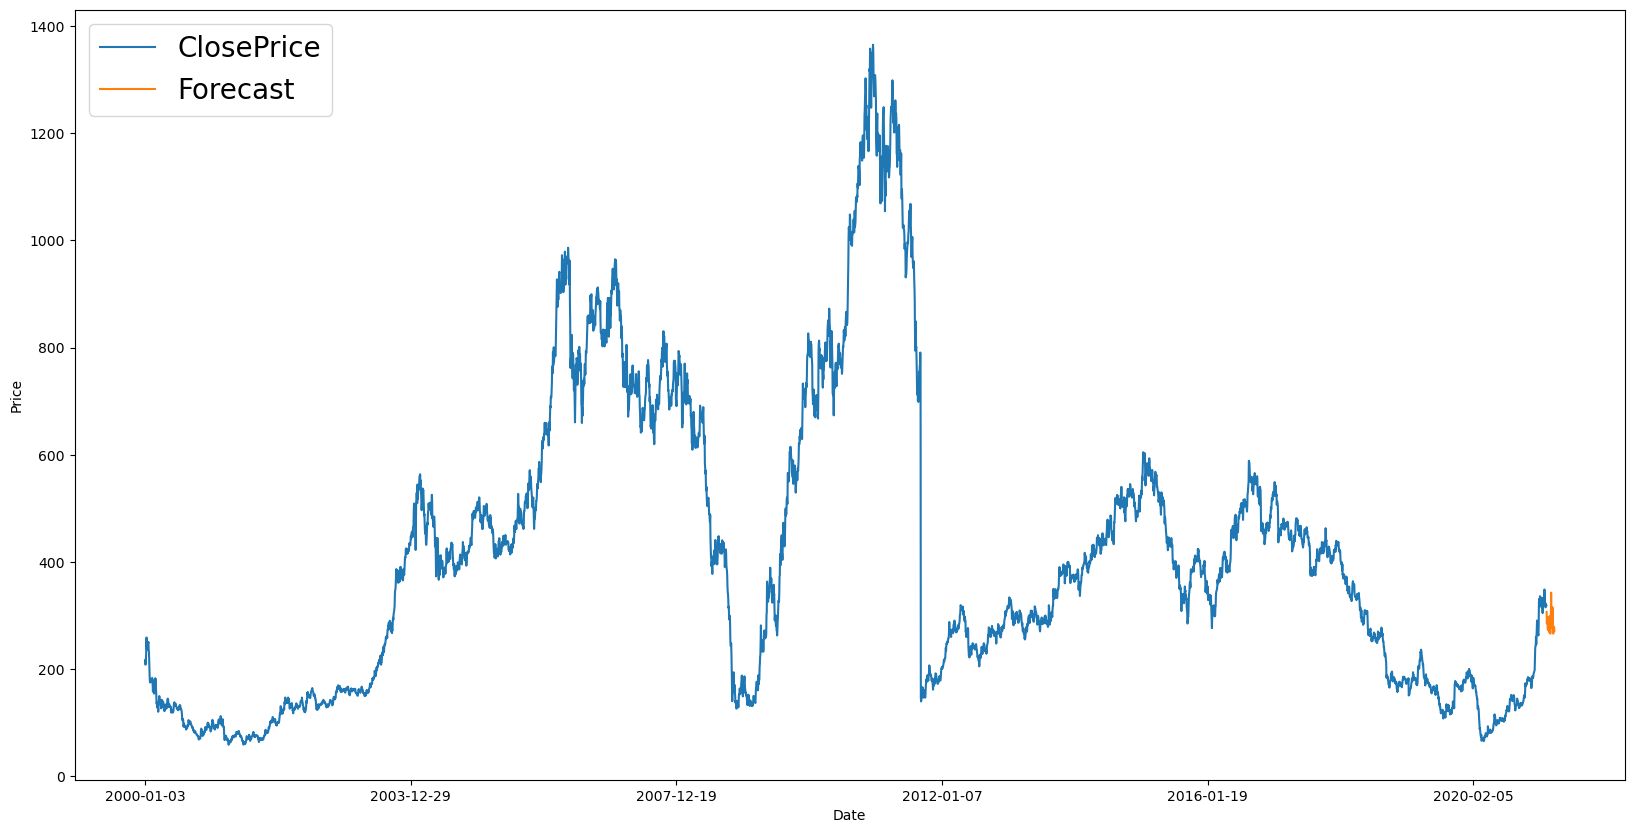

In [55]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')